# Population in Ireland

## 1 Data Reading and Cleaning

### 1.1 Reading Data

We use some useful libraries for our project.
These are:
- Pandas: A versatile data manipulation and analysis library. It provides easy-to-use data structures and functions for working with structured data, making it an essential tool for data processing and analysis.
- Numpy: A fundamental library for numerical operations in Python. It offers support for arrays, matrices, and various mathematical functions, making it an essential tool for scientific computing and data analysis.
- Seaborn: A data visualization library based on Matplotlib. Seaborn provides an interface for creating informative and attractive statistical graphics, which is particularly useful for exploring and understanding complex datasets.
- Matplotlib.pyplot: A widely used plotting library for creating static, animated, or interactive visualizations in Python. It is a fundamental tool for data visualization and report generation in a wide range of domains.
- %matplotlib inline: This magic command in Jupyter Notebook allows the generated plots or visualizations to be displayed directly within the notebook. It's particularly useful when using libraries like Matplotlib for data visualization.

In [1]:
import pandas as pd               # Used for data analysis and processing.
import numpy as np                # Used for multi-dimensional arrays and mathematical operations.
import seaborn as sns             # Provides a high-level interface for data visualization.
import matplotlib.pyplot as plt   # Used for creating plots and graphs.
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df=pd.read_csv("PEA01.20231007T221014.csv") # we read dataset

In [3]:
df.head(5) # We dispplay first 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [4]:
df.tail(5) # We display last 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
5989,Population Estimates (Persons in April),2023,85 years and over,Male,Thousand,33.1
5990,Population Estimates (Persons in April),2023,85 years and over,Female,Thousand,53.9
5991,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
5992,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2
5993,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675.4


In [5]:
total_rows=df.shape[0]
total_columns=df.shape[1]
print(f"Total Rows= {total_rows}")
print(f"Total Columns= {total_columns}")

Total Rows= 5994
Total Columns= 6


In [6]:
df.describe()

,Year,VALUE
count,5994.000000,5880.000000
mean,1986.500000,347.001088
std,21.361791,601.822682
min,1950.000000,5.500000
25%,1968.000000,79.475000
50%,1986.500000,151.700000
75%,2005.000000,307.725000
max,2023.000000,5281.600000


In [7]:
df.describe(include="object")

,STATISTIC Label,Age Group,Sex,UNIT
count,5994,5994,5994,5994
unique,1,27,3,1
top,Population Estimates (Persons in April),Under 1 year,Both sexes,Thousand
freq,5994,222,1998,5994


In [8]:
df.dtypes

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

In [9]:
#df.info()

In [10]:
df.nunique()

STATISTIC Label       1
Year                 74
Age Group            27
Sex                   3
UNIT                  1
VALUE              3387
dtype: int64

In [11]:
df.count()

STATISTIC Label    5994
Year               5994
Age Group          5994
Sex                5994
UNIT               5994
VALUE              5880
dtype: int64

In [12]:
df.isnull().sum()

STATISTIC Label      0
Year                 0
Age Group            0
Sex                  0
UNIT                 0
VALUE              114
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
to_drop=["STATISTIC Label","UNIT"] 
df.drop(columns=to_drop,inplace=True)

In [15]:
df=df.rename(columns={"VALUE":"Value"})

In [16]:
missing_df=df[df.isna().any(axis=1)] #missing data rows
missing_df

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
5,1950,0 - 4 years,Female,NaN
165,1952,0 - 4 years,Both sexes,NaN
166,1952,0 - 4 years,Male,NaN
...,...,...,...,...
3568,1994,0 - 4 years,Male,NaN
3569,1994,0 - 4 years,Female,NaN
3648,1995,0 - 4 years,Both sexes,NaN
3649,1995,0 - 4 years,Male,NaN


In [17]:
all_0_4=df[(df["Age Group"]=="0 - 4 years")]
all_0_4

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
5,1950,0 - 4 years,Female,NaN
84,1951,0 - 4 years,Both sexes,312.9
85,1951,0 - 4 years,Male,160.0
...,...,...,...,...
5836,2022,0 - 4 years,Male,151.6
5837,2022,0 - 4 years,Female,144.2
5916,2023,0 - 4 years,Both sexes,293.8
5917,2023,0 - 4 years,Male,149.2


In [18]:
# We fill the missing data in the "0 - 4 years" age group with the sum of "Under 1 year" and "1 - 4 years" age groups.

for year in df['Year'].unique():
    for sex in df['Sex'].unique():
        total_value = df[(df['Year'] == year) & (df['Sex'] == sex) & 
                         (df['Age Group'].isin(['Under 1 year', '1 - 4 years']))]['Value'].sum()
        missing_value = (df['Year'] == year) & (df['Sex'] == sex) & (df['Age Group'] == '0 - 4 years')
        df.loc[missing_value, 'Value'] = total_value

# After filling in the missing data, we view the first and last 5 values of the data frame.
print(df.head(5))
print(df.tail(5))

   Year     Age Group         Sex  Value
0  1950  Under 1 year  Both sexes   61.1
1  1950  Under 1 year        Male   31.4
2  1950  Under 1 year      Female   29.7
3  1950   0 - 4 years  Both sexes  310.2
4  1950   0 - 4 years        Male  158.9
      Year          Age Group         Sex   Value
5989  2023  85 years and over        Male    33.1
5990  2023  85 years and over      Female    53.9
5991  2023           All ages  Both sexes  5281.6
5992  2023           All ages        Male  2606.2
5993  2023           All ages      Female  2675.4


In [19]:
all_0_4=df[(df["Age Group"]=="0 - 4 years")]
all_0_4[:]

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
5,1950,0 - 4 years,Female,151.3
84,1951,0 - 4 years,Both sexes,312.9
85,1951,0 - 4 years,Male,160.2
...,...,...,...,...
5836,2022,0 - 4 years,Male,151.5
5837,2022,0 - 4 years,Female,144.2
5916,2023,0 - 4 years,Both sexes,293.8
5917,2023,0 - 4 years,Male,149.2


In [21]:
year = 1965
age_range = "0 - 4 years"
sex = "Both sexes"

# We print the result for a specific year, age range, and gender.
result = df[(df['Year'] == year) & (df['Age Group'] == age_range) & (df['Sex'] == sex)]['Value'].values[0]
print(f"In {year}, the result for the age group {age_range}, and the gender {sex} is: {result}")

In 1965, the result for the age group 0 - 4 years, and the gender Both sexes is: 313.4


In [23]:
year = 1965
age_range = "1 - 4 years"
sex = "Both sexes"

# We print the result for a specific year, age range, and gender.
result = df[(df['Year'] == year) & (df['Age Group'] == age_range) & (df['Sex'] == sex)]['Value'].values[0]
print(f"In {year}, the result for the age group {age_range}, and the gender {sex} is: {result}")

In 1965, the result for the age group 1 - 4 years, and the gender Both sexes is: 251.0


In [25]:
year = 1965
age_range = "Under 1 year"
sex = "Both sexes"

# We print the result for a specific year, age range, and gender.
result = df[(df['Year'] == year) & (df['Age Group'] == age_range) & (df['Sex'] == sex)]['Value'].values[0]
print(f"In {year}, the result for the age group {age_range}, and the gender {sex} is: {result}")

In 1965, the result for the age group Under 1 year, and the gender Both sexes is: 62.4


In [26]:
toplam_yas = df[(df['Year'] == 1965) & (df['Sex'] == "Both sexes") & (df['Age Group'].isin(['Under 1 year', '1 - 4']))]['Value'].sum()
toplam_yas

62.4

In [27]:
df[(df['Year'] == 1950) & (df['Age Group'] == '1 - 4 years')]

,Year,Age Group,Sex,Value
9,1950,1 - 4 years,Both sexes,249.1
10,1950,1 - 4 years,Male,127.5
11,1950,1 - 4 years,Female,121.6


In [28]:
df[(df['Year'] == 1965) & (df['Age Group'] == 'Under 1 year')]

,Year,Age Group,Sex,Value
1215,1965,Under 1 year,Both sexes,62.4
1216,1965,Under 1 year,Male,31.8
1217,1965,Under 1 year,Female,30.6


In [29]:
df['Year'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [30]:
df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [31]:
df['Age Group'].unique()

array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
       '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages'], dtype=object)

In [32]:
df.head(10)

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
5,1950,0 - 4 years,Female,151.3
6,1950,0 - 14 years,Both sexes,851.2
7,1950,0 - 14 years,Male,434.6
8,1950,0 - 14 years,Female,416.6
9,1950,1 - 4 years,Both sexes,249.1


In [35]:
Under_1_year=df[(df["Age Group"]=="Under 1 year")  & (df["Sex"]=="Both sexes" )]
Under_1_year.head(5)

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
81,1951,Under 1 year,Both sexes,63.6
162,1952,Under 1 year,Both sexes,61.9
243,1953,Under 1 year,Both sexes,60.1
324,1954,Under 1 year,Both sexes,60.1


In [37]:
Under_1_year.shape

(74, 4)

In [36]:
both_1_4=df[(df["Age Group"]=="1 - 4 years")  & (df["Sex"]=="Both sexes" )]
both_1_4.head(5)

,Year,Age Group,Sex,Value
9,1950,1 - 4 years,Both sexes,249.1
90,1951,1 - 4 years,Both sexes,249.3
171,1952,1 - 4 years,Both sexes,248.4
252,1953,1 - 4 years,Both sexes,248.1
333,1954,1 - 4 years,Both sexes,245.8


In [38]:
both_1_4.shape

(74, 4)

In [39]:
all_0_4=df[(df["Age Group"]=="0 - 4 years")]
all_0_4.head(5)

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
5,1950,0 - 4 years,Female,151.3
84,1951,0 - 4 years,Both sexes,312.9
85,1951,0 - 4 years,Male,160.2


In [40]:
all_0_4.shape

(222, 4)

In [41]:
all_0_4.isnull().sum()

Year         0
Age Group    0
Sex          0
Value        0
dtype: int64

In [42]:
male_0_4=df[(df["Age Group"]=="0 - 4 years") & (df["Sex"]=="Male")]

In [43]:
male_0_4.head(5)

,Year,Age Group,Sex,Value
4,1950,0 - 4 years,Male,158.9
85,1951,0 - 4 years,Male,160.2
166,1952,0 - 4 years,Male,158.7
247,1953,0 - 4 years,Male,157.5
328,1954,0 - 4 years,Male,156.2


In [44]:
male_0_4.shape

(74, 4)

In [45]:
male_0_4.isnull().sum()

Year         0
Age Group    0
Sex          0
Value        0
dtype: int64

In [46]:
year_1950=df[(df["Year"]==2022) & (df["Sex"]=="Both sexes")]

In [47]:
print("Shape= ",year_1950.shape,"\n")
print(year_1950.head(5))

Shape=  (27, 4) 

      Year     Age Group         Sex   Value
5832  2022  Under 1 year  Both sexes    57.7
5835  2022   0 - 4 years  Both sexes   295.9
5838  2022  0 - 14 years  Both sexes  1014.3
5841  2022   1 - 4 years  Both sexes   238.2
5844  2022   5 - 9 years  Both sexes   343.6


In [48]:
year_1950.head(27)

,Year,Age Group,Sex,Value
5832,2022,Under 1 year,Both sexes,57.7
5835,2022,0 - 4 years,Both sexes,295.9
5838,2022,0 - 14 years,Both sexes,1014.3
5841,2022,1 - 4 years,Both sexes,238.2
5844,2022,5 - 9 years,Both sexes,343.6
5847,2022,10 - 14 years,Both sexes,374.9
5850,2022,15 - 19 years,Both sexes,337.8
5853,2022,15 - 24 years,Both sexes,649.7
5856,2022,15 years and over,Both sexes,4169.7
5859,2022,20 - 24 years,Both sexes,311.9


In [50]:
total_value = year_1950['Value'].sum()
print("Toplam Değer:", total_value)

Toplam Değer: 20017.6


In [54]:
#df["Value"]=df["Value"]*1000
#df["Value"]=df["Value"]/100

In [55]:
df

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
...,...,...,...,...
5989,2023,85 years and over,Male,33.1
5990,2023,85 years and over,Female,53.9
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


In [56]:
df.count()

Year         5994
Age Group    5994
Sex          5994
Value        5994
dtype: int64

<Axes: xlabel='Value'>

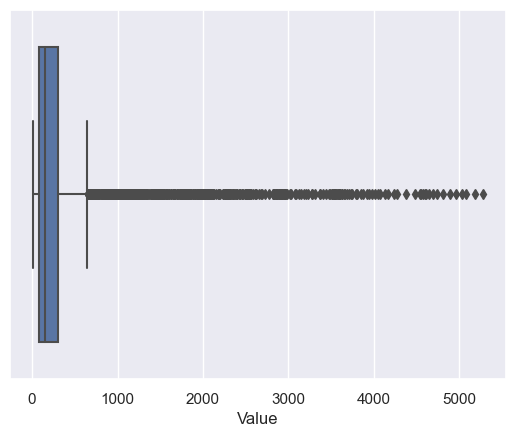

In [57]:
sns.boxplot(x=df["Value"])

In [58]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year      37.00
Value    227.15
dtype: float64


C:\Users\TUNA\AppData\Local\Temp\ipykernel_13676\2377082437.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\TUNA\AppData\Local\Temp\ipykernel_13676\2377082437.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)


In [59]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [60]:
outliers = (df < lower_bound) | (df > upper_bound)

C:\Users\TUNA\AppData\Local\Temp\ipykernel_13676\2729132471.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_bound) | (df > upper_bound)


In [61]:
outliers_df = df[outliers.any(axis=1)]

In [ ]:
outliers_df

In [ ]:
df

In [ ]:
df.hist(column="Value",bins=20)

In [ ]:
df["Age Group"].unique()

In [ ]:
Age_Group_Value_Counts=pd.crosstab(index=df["Age Group"],columns="Value")

In [ ]:
Age_Group_Value_Counts

In [ ]:
from numpy import median, mean

In [ ]:
sns.set(style="whitegrid")

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Age Group", y="Value", hue="Age Group", data=df)
plt.xticks(rotation=90)
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Age Group",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Year",y="Value",hue="Age Group");
plt.ylabel("Value (Thousand)")
plt.xticks(rotation=90);
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1));

In [ ]:
import math
subset_0_14_years=df[(df["Age Group"]=="0 - 14 years")]
print(subset_0_14_years,"\n\n")
print("Minimum value:\n",subset_0_14_years.min(),"\n")
print("Maximum value:\n",subset_0_14_years.max(),"\n")

In [ ]:
#min_value=(subset_0_14_years["Value"].apply(math.ceil).min())-1
#max_value=subset_0_14_years["Value"].max()
min_value=subset_0_14_years["Value"].apply(lambda x: (math.ceil(x/100)*100)-100).min()
max_value=subset_0_14_years["Value"].apply(lambda x: math.ceil(x/100)*100).max()
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")
plt.yticks(np.arange(min_value, max_value, step=30))
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

In [ ]:
#min_value=(subset_0_14_years["Value"].apply(math.ceil).min())-1
max_value=subset_0_14_years["Value"].max()
min_value=subset_0_14_years["Value"].apply(lambda x: (math.ceil(x/100)*100)-100).min()
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")

plt.yticks(np.arange(min_value, max_value, step=30))
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(subset_0_14_years["Year"], subset_0_14_years["Value"])
ax.set_title("Value By Years")
ax.set_xlabel("Year")
ax.set_ylabel("Value")
plt.show()

In [ ]:
subset_0_4_years=df[(df["Age Group"]=="0 - 4 years") & (df["Sex"]=="Male")]
print(subset_0_4_years.head(),"\n\n")
print("Minimum value:\n",subset_0_4_years.min(),"\n")
print("Maximum value:\n",subset_0_4_years.max(),"\n")

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age Group"], df["Value"])
ax.set_xlabel("Age Group")
plt.xticks(rotation=90)
ax.set_ylabel("Value")
plt.title("Value By Age Group")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age Group"]=="0 - 14 years", df["Value"])
ax.set_xlabel("Age Group")
ax.set_ylabel("Value")
plt.show()

In [ ]:

# # Kategorik verileri sayısal olarak kodlayalım
# df['Age Group Code'] = pd.Categorical(df['Age Group']).codes

# # Sütunları x, y ve renk olarak kullanarak scatter plot oluşturun
# fig, ax = plt.subplots(figsize=(12, 10))
# scatter = ax.scatter(df["Year"], df["Value"], c=df["Age Group Code"], cmap='viridis', marker='o')

# # Renk skalasını oluşturun ve eksen etiketlerini ayarlayın
# cbar = plt.colorbar(scatter)
# cbar.set_label("Age Group")
# ax.set_xlabel("Year")
# ax.set_ylabel("Value")
# plt.show()




In [ ]:
# df["Age Group"].unique()

In [ ]:
# # Belirlediğiniz renk listesi
# colors = ['red', 'green', 'blue', 'orange', 'purple']

# # Her bir "Age Group" kategorisi için "VALUE" sütununun ortalamasını hesaplayalım
# grouped_data = df.groupby('Age Group')['Value'].mean()

# # Çubuk grafik oluşturalım ve belirlediğiniz renkleri kullanalım
# fig, ax = plt.subplots(figsize=(10, 6))
# grouped_data.plot(kind='bar', ax=ax, color=colors)
# ax.set_xlabel("Age Group")
# ax.set_ylabel("Average Value")
# plt.show()

In [ ]:
# # Kategorik verileri sayısal olarak kodlayalım
# age_group_order = [
#     'Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years', '5 - 9 years', '10 - 14 years',
#     '15 - 19 years', '15 - 24 years', '15 years and over', '20 - 24 years',
#     '25 - 29 years', '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
#     '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
#     '60 - 64 years', '65 - 69 years', '65 years and over', '70 - 74 years',
#     '75 - 79 years', '80 - 84 years', '85 years and over', 'All ages'
# ]

# df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_group_order, ordered=True)
# df['Age Group Code'] = df['Age Group'].cat.codes

# # Sütunları x, y ve renk olarak kullanarak scatter plot oluşturun
# fig, ax = plt.subplots(figsize=(12, 10))
# scatter = ax.scatter(df["Year"], df["Value"], c=df["Age Group Code"], cmap='viridis', marker='o')

# # Renk skalasını oluşturun ve eksen etiketlerini ayarlayın
# cbar = plt.colorbar(scatter)
# cbar.set_label("Age Group")
# ax.set_xlabel("Year")
# ax.set_ylabel("Value")
# plt.show()